## Atividade Prática 3: Transformada de Fourier para imagens

### Nome: Diogo José Costa Alves 
### N° USP: 13709881. 

A transformada de Fourier de uma imagem $A\in\mathcal{M}_{m,n}(\mathbb{C})$ é a matriz $\hat{A}=DFT(A)\in\mathcal{M}_{m,n}(\mathbb{C})$ cujas componentes são

$$\hat{A}_{k,l} = \left(A,\mathcal{E}_{k,l}\right) = \sum_{r=0}^{m-1}\sum_{s=0}^{n-1}A_{r,s}e^{-i2\pi(kr/m+ls/n)},\quad k=0,\ldots,m-1,\quad l=0,\ldots,n-1,$$

onde $\hat{A}_{k,l}$ correspondem aos coeficientes não-normalizados da mudança de base da representação usual (base canônica) para a base das formas básicas de onda bidimensionais dadas pelas matrizes $\mathcal{E}_{k,l}$ cujas componentes são

$$\left(\mathcal{E}_{k,l}\right)_{r,s} = e^{i2\pi(kr/m+ls/n)},\quad r=0,\ldots,m-1,\quad s=0,\ldots,n-1.$$

Observe que nessa definição, $k$ e $l$ são índices associados às *frequências de varredura por linhas e por colunas*, respectivamente, enquanto $r$ e $s$ são os índices de linhas e colunas dentro das matrizes $A$ e $\mathcal{E}_{k,l}$. 

---

**Exercício 1a:** Adapte o código da implementação "ingênua" da DFT unidimensional, fornecido abaixo, para produzir uma implementação análoga da DFT bidimensional, que calcule a fórmula dos $\hat{A}_{k,l}$ diretamente pela definição acima.

In [26]:
import math
import numpy as np

def DFTingenua(x):
    N = len(x); n = np.array(range(N))
    X = np.ndarray(N, dtype=complex)
    for k in range(N):
        X[k] = sum(x*np.exp(-1j*2*math.pi*k*n/N))
    return X

In [69]:
# Resposta do exercício 1a
def DFT2ingenua(A):
    # Inclua aqui sua implementação, armazenando o resultado numa variável Ahat
    m, n = A.shape
    Ahat = np.zeros((m,n), dtype='complex')
    for k in range(m):
        for l in range(n):
            for r in range(m):
                for s in range(n):
                    Ahat[k][l] += A[r][s] * np.exp(-1j*2*math.pi*(k*r/m + l*s/n))
    return Ahat

def teste_dft2d(dut, m, n, verbose=False):
    A = np.random.randn(m*n).reshape((m,n))
    golden = np.fft.fft2(A)
    res = dut(A)
    
    if verbose:
        print(np.round(golden))
        print(np.round(res))
        
    assert np.allclose(golden, res) == True, 'Teste falhou!'
    print('Teste passou!')
    
teste_dft2d(DFT2ingenua,13,15, verbose=False)

Teste passou!


---

### Testes automatizados

É possível testar automaticamente o código da DFT comparando as saídas da função implementada com valores pré-calculados a partir da definição. Por exemplo, na DFT 1D vimos (exercício 2.4 da última lista) que os vetores $e_r=(0,\ldots,0,\overbrace{1}^{i=r},0,\ldots,0)$ da base canônica possuem como DFT os vetores
$$DFT(e_r) = \overline{E_r} = (e^0,e^{-i2\pi r/N},e^{-i2\pi 2r/N},\ldots,e^{-i2\pi (N-1)r/N}).$$

Esses casos de teste são utilizados na função abaixo. Para cada $e_r$ ela constrói a DFT teórica (variável DFTe_r) e a compara com o resultado da chamada da função DFTingenua(e_r). Observe que o código só imprime a frase no final porque todas as comparações (asserts) confirmam que 
$$\text{DFTingenua(e_r)}\approx\text{DFTe_r}$$
(o código usa $\varepsilon=10^{-8}$ como tolerância nas comparações).

In [5]:
# teste automatizado:
# para cada vetor e_r da base canônica, computa sua DFT
# e compara com a expressão teórica DFT(e_r)=\overline{E_r} (E_r conjugado)
def testeDFTingenua(N):
    for r in range(N):
        e_r = np.zeros(N); e_r[r] = 1
        DFTe_r = [ np.exp(-1j*2*m.pi*r*k/N) for k in range(N) ]
        assert np.linalg.norm(DFTingenua(e_r)-DFTe_r) < 1e-8

testeDFTingenua(4)
print("A função DFTingenua passou no teste!")

A função DFTingenua passou no teste!


---

**Exercício 1b:** Adapte o código do teste automatizado da DFT unidimensional fornecido acima para testar sua implementação da DFT bidimensional. Seu teste deve percorrer todas as matrizes da base canônica de $\mathcal{M}_{m,n}(\mathbb{C})$ e comparar o resultado de sua função DFT2ingenua com a DFT prevista pela definição. Você deve construir essas DFTs previstas a partir das expressões teóricas: dada uma matriz da base canônica $e_{r,s}\in\mathcal{M}_{m,n}(\mathbb{C})$ definida por $(e_{r,s})_{i,j} = 1$ se $(r,s)=(i,j)$ e $(e_{r,s})_{i,j} = 0$ caso contrário, sua DFT é a matriz $\hat{e}_{r,s}\in\mathcal{M}_{m,n}(\mathbb{C})$ cujas componentes são

$$\left(\hat{e}_{r,s}\right)_{k,l} = e^{-i2\pi(kr/m+ls/n)},\quad k=0,\ldots,m-1,\quad l=0,\ldots,n-1.$$

In [74]:
# Resposta do exercício 1b
def testeDFT2ingenua(M,N):
    # Inclua aqui sua implementação
    for r in range(M):
        for s in range(N):
            ee_rs = np.zeros((M,N), dtype='complex')
            ee_rs[r][s] = 1

            dut_result = DFT2ingenua(ee_rs)
            
            DFT_ee_rs = np.zeros((M,N), dtype='complex')
            for k in range(M):
                for l in range(N):
                    DFT_ee_rs[k][l] += np.exp(-1j*2*math.pi*(k*r/M + l*s/N)) 
            
            assert (np.linalg.norm(dut_result - DFT_ee_rs) < 1e-8)
    
testeDFT2ingenua(4,8)
# testeDFT2ingenua(2,2)
print("A função DFT2ingenua passou no teste!")

A função DFT2ingenua passou no teste!


---

## DFT 2D como DFT nas linhas e nas colunas de A

Uma relação muito importante entre a DFT unidimensional e a DFT bidimensional é a seguinte: se $\hat{A} = DFT(A)$, onde $A,\hat{A}\in\mathcal{M}_{m,n}(\mathbb{C})$, então

$$\hat{A} = F_mAF_n^T,$$

onde $F_m\in\mathcal{M}_{m,m}(\mathbb{C})$ e $F_n\in\mathcal{M}_{n,n}(\mathbb{C})$ são as matrizes que representam as DFTs unidimensionais nos espaços $\mathbb{C}^m$ e $\mathbb{C}^n$, respectivamente.

Para ver que isso é verdade, basta calcular o produto de matrizes acima:

$$\begin{array}{ll}
\left(F_mAF_n^T\right)_{k,l} & = ((F_mA)F_n^T)_{k,l}\\
& = \mbox{"linha k de $F_mA$" $\quad\times\quad$ "coluna l de $F_n^T$"}\\
& = \mbox{"linha k de $F_mA$" $\quad\times\quad$ "linha l de $F_n$"}\\
& = \displaystyle\sum_{s=0}^{n-1}(FmA)_{k,s}e^{-i2\pi ls/n}\\
& = \displaystyle\sum_{s=0}^{n-1}\left(\sum_{r=0}^{m-1}A_{r,s}e^{-i2\pi kr/m}\right)e^{-i2\pi ls/n}\\
& = \displaystyle\sum_{r=0}^{m-1}\sum_{s=0}^{n-1}A_{r,s}e^{-i2\pi(kr/m+ls/n)}\\
& = \hat{A}_{k,l}
\end{array}$$

A interpretação algorítmica da identidade $DFT(A) = F_mAF_n^T$ é a seguinte:

- A parte $F_mA$ pode ser vista como uma aplicação da DFT nas **colunas** de A:

$$F_mA = \left[\begin{array}{l|l|l|l}
\rule{0mm}{0mm}\\
F_mA^0&F_mA^1&\ldots&F_mA^{n-1}\\
\rule{0mm}{0mm}
\end{array}\right]
 = \left[\begin{array}{l|l|l|l}
\rule{0mm}{0mm}\\
DFT(A^0)&DFT(A^1)&\ldots&DFT(A^{n-1})\\
\rule{0mm}{0mm}
\end{array}\right]$$

- O produto subsequente por $F_n^T$ pode ser visto como uma aplicação da DFT nas **linhas** da matriz resultante $X=F_mA$, pois

$$XF_n^T = \left[\begin{array}{c}
\rule{2cm}{0mm}X_0F_n^T\rule{2cm}{0mm}\\\hline
X_1F_n^T\\\hline
\vdots\\\hline
X_{m-1}F_n^T
\end{array}\right]
 = \left[\begin{array}{c}
\rule{2cm}{0mm}DFT(X_0)^T\rule{2cm}{0mm}\\\hline
DFT(X_1)^T\\\hline
\vdots\\\hline
DFT(X_{m-1})^T
\end{array}\right]$$

- Finalmente, a associatividade do produto de matrizes $$F_mAF_n^T=(F_mA)F_n^T=F_m(AF_n^T)$$ permite ver que o mesmo resultado poderia ser atingido calculando-se primeiro a DFT das linhas de $A$ e depois a DFT das colunas resultantes.

---

**Exercício 2a:** Use a implementação da FFT unidimensional abaixo para construir uma implementação da FFT bidimensional usando a identidade $DFT(A) = F_mAF_n^T$.

In [50]:
def FFT(x):
    N = len(x);
    if N<=1: return x
    X = np.ndarray(N, dtype=complex)
    Xpar = FFT(x[0:N:2])
    Ximpar = FFT(x[1:N:2])
    for k in range(N):
        X[k] = Xpar[k%(N//2)]+np.exp(-1j*2*m.pi*k/N)*Ximpar[k%(N//2)]
    return X

In [53]:
# Resposta do exercício 2a
# Dica: a linha i da matriz A pode ser acessada como A[i,:] e a coluna j como A[:,j]
def FFT2(A):
    # Inclua aqui sua implementação
    m, n = A.shape
    
    tmp1 = np.zeros((m,n), dtype='complex')
    tmp2 = np.zeros((n,m), dtype='complex')
    for row in range(m):
        tmp1[row] = FFT(A[row])
    for col in range(n):
        tmp2[col] = FFT(tmp1.T[col])
    Ahat = tmp2.T
    return Ahat

---

**Exercício 2b:** Escreva uma função para testar sua implementação da FFT bidimensional, comparando os resultados dessa função com a sua implementação DFT2ingenua.

In [54]:
# Resposta do exercício 2b
def testeFFT2(M,N):
    # Inclua aqui sua implementação
    A = np.random.randn(M*N).reshape((M,N))
    golden = DFT2ingenua(A)
    dut = FFT2(A)
    
    assert np.allclose(golden, dut) , 'Teste falhou!'
                         
testeFFT2(4,8)
print("A função FFT2 passou no teste!")

A função FFT2 passou no teste!


### Chegando aqui você já pode entregar seu trabalho no e-disciplinas!
#### A leitura/execução da parte abaixo é opcional

---

### Comparação de tempos entre DFT 2D e FFT 2D

O código abaixo traz pronta uma comparação de tempos entre as implementações das DFT 2D e FFT 2D que você fez, aplicando-as a matrizes aleatórias de tamanho $N\times N$ para $N=1,2,4,8,\ldots,1024$. Nessa comparação você pode observar a diferença entre a complexidade da implementação ingênua da DTF 2D ($\mathcal{O}(M^2N^2)$) e a da FFT 2D ($\mathcal{O}(MN\log (MN))$).

In [63]:
from time import time
import matplotlib.pyplot as plt
N = np.linspace(1,25,5,dtype='int') # tamanhos de vetor
TDFT = np.zeros(len(N)) # tempos de execução
TFFT = np.zeros(len(N)) # tempos de execução
R = 5 # número de repetições para cada N
print("Rodando experimento...")
for r in range(R):
    for i in range(len(N)):
        x = np.random.rand(N[i],N[i])
        t = time(); DFT2ingenua(x); TDFT[i] += (time()-t)/R
        t = time(); FFT2(x); TFFT[i] += (time()-t)/R
    print("{}% completado...".format(100*(r+1)/R),end="\r")
print("Pronto!             ")

Rodando experimento...
Pronto!             


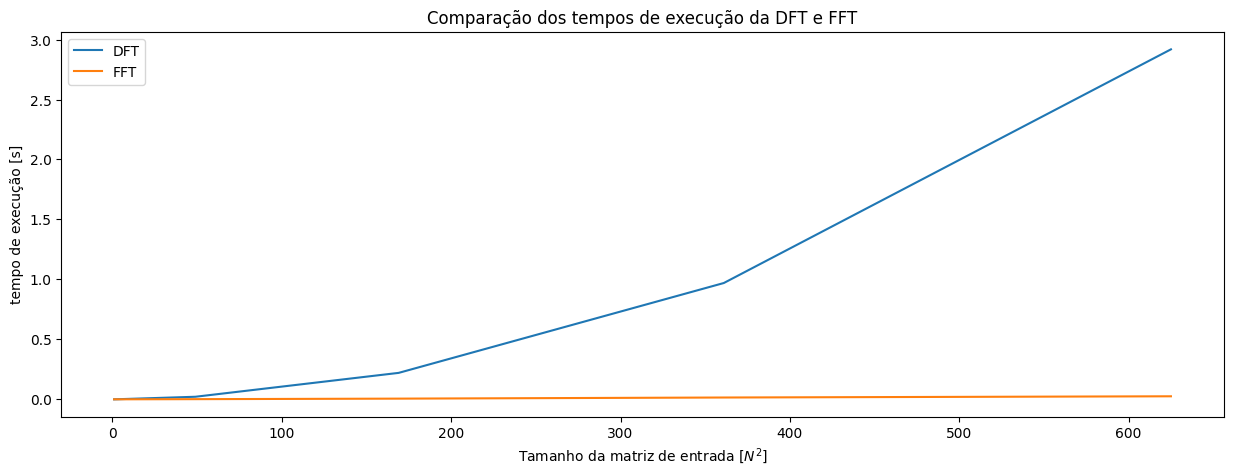

In [64]:
plt.figure(figsize=(15,5))
plt.plot(np.square(N),TDFT,label="DFT")
plt.plot(np.square(N),TFFT,label="FFT")
plt.title("Comparação dos tempos de execução da DFT e FFT")
plt.xlabel(r"Tamanho da matriz de entrada [$N^2$]")
plt.ylabel("tempo de execução [s]")
plt.legend()
plt.show()